# COM6018 - Assignment 1

Student Username: `acp23pks `

## Analysing Carbon Emissions Data

Before attempting the assignment make sure that you have read the accompanying assignment notes document carefully. This explains important details about what is expected and how you will be assessed.

## Loading the data

The data is being read from the file `owid-co2-data.csv` which you must download and store in the same directory as this notebook. Please leave the cell below unchanged. 

In [1]:
import pandas as pd

df = pd.read_csv('owid-co2-data.csv')

Add any further imports that your notebook needs in the cell below. If you are not using any then simply leave the cell blank. Remember, you are only allowed to use modules from the standard Python library, plus pandas, numpy, matplotlib and seaborn.

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

## Q1. The growth of CO<sub>2</sub> emissions

*How have CO<sub>2</sub> emissions grown over time?*

The dataset contains entries for countries grouped into four income groups: low, lower-middle, upper-middle and high. i) How have the total annual CO<sub>2</sub> emissions of each income group varied over the years 1950 to 2021? ii) How has the per capita CO<sub>2</sub> emissions (i.e., the emissions per person) of these groups varied over the same period. Comment on how the contribution of each income group is different when measured in terms of total emissions and per capita emissions.

(Add your solution below. Add further markdown and code cells as needed.)

In [3]:
# Load the dataset
data = pd.read_csv("owid-co2-data.csv")


In [4]:
null_values = data.isnull().sum()
print(null_values)


country                            0
year                               0
iso_code                        8456
population                     10590
gdp                            36034
                               ...  
temperature_change_from_n2o    12978
total_ghg                      44449
total_ghg_excluding_lucf       44449
trade_co2                      46339
trade_co2_share                46340
Length: 79, dtype: int64


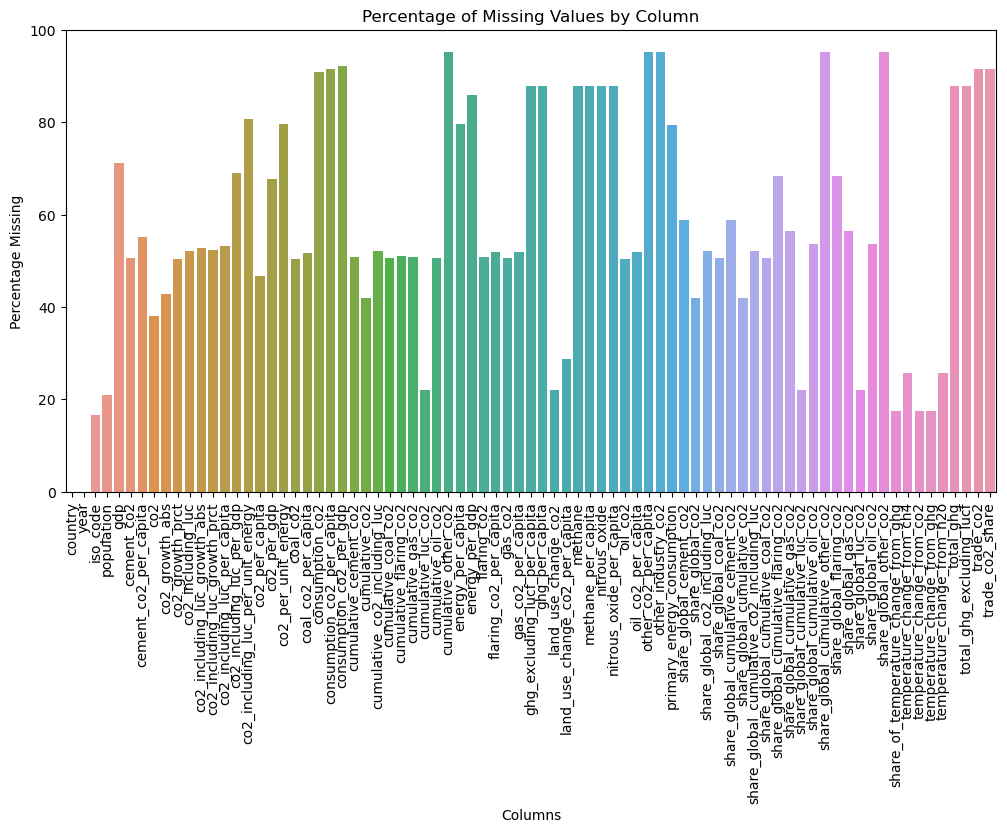

In [5]:
# Calculate the percentage of missing values for each column
missing_percentage = (data.isnull().sum() / len(data)) * 100

# Create a bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x=missing_percentage.index, y=missing_percentage)
plt.title("Percentage of Missing Values by Column")
plt.xlabel("Columns")
plt.ylabel("Percentage Missing")
plt.xticks(rotation=90)  # Rotate x-axis labels for readability
plt.show()

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50598 entries, 0 to 50597
Data columns (total 79 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   country                                    50598 non-null  object 
 1   year                                       50598 non-null  int64  
 2   iso_code                                   42142 non-null  object 
 3   population                                 40008 non-null  float64
 4   gdp                                        14564 non-null  float64
 5   cement_co2                                 24974 non-null  float64
 6   cement_co2_per_capita                      22714 non-null  float64
 7   co2                                        31349 non-null  float64
 8   co2_growth_abs                             28944 non-null  float64
 9   co2_growth_prct                            25032 non-null  float64
 10  co2_including_luc     

In [7]:
# Filter data for the years 1950 to 2021 and make a copy
data = data[(data['year'] >= 1950) & (data['year'] <= 2021)].copy()

In [8]:
# Define the income groups
income_groups = ['low', 'lower-middle', 'upper-middle', 'high']

In [9]:
# Initialize empty DataFrames to store results
total_emissions_by_income = pd.DataFrame()
per_capita_emissions_by_income = pd.DataFrame()

In [10]:
# Create an 'income_group' column based on GDP per capita values
income_thresholds = [1000, 4000, 12000, 28000, float('inf')]
income_labels = ['low', 'lower-middle', 'upper-middle', 'high'] 
data['income_group'] = pd.cut(data['gdp'] / data['population'], bins=income_thresholds, labels=income_labels)

In [11]:
# Define the income groups
income_groups = ['low', 'lower-middle', 'upper-middle', 'high']

In [12]:
# Initialize DataFrames to store results
total_emissions_by_income = pd.DataFrame({'year': data['year'].unique()})
per_capita_emissions_by_income = pd.DataFrame({'year': data['year'].unique()})

In [13]:
# Iterate through income groups and calculate total and per capita emissions
for income_group in income_groups:
    group_data = data[data['income_group'] == income_group]
    
    # Total annual CO2 emissions
    total_emissions = group_data.groupby('year')['co2'].sum().reset_index()
    total_emissions.rename(columns={'co2': f'{income_group}_total_emissions'}, inplace=True)
    
    # Per capita CO2 emissions
    per_capita_emissions = group_data.groupby('year')['co2_per_capita'].mean().reset_index()
    per_capita_emissions.rename(columns={'co2_per_capita': f'{income_group}_per_capita_emissions'}, inplace=True)
    
    # Merge with the main DataFrames
    total_emissions_by_income = pd.merge(total_emissions_by_income, total_emissions, on='year', how='outer')
    per_capita_emissions_by_income = pd.merge(per_capita_emissions_by_income, per_capita_emissions, on='year', how='outer')

In [14]:
# Display the total and per capita emissions by income group over the years
print("Total Annual CO2 Emissions by Income Group:")
print(total_emissions_by_income)

print("\nPer Capita CO2 Emissions by Income Group:")
print(per_capita_emissions_by_income)

Total Annual CO2 Emissions by Income Group:
    year  low_total_emissions  lower-middle_total_emissions  \
0   1950             6523.279                      1849.532   
1   1951              373.702                      1975.121   
2   1952              581.638                      2096.566   
3   1953              611.425                      2071.899   
4   1954              478.775                      1806.440   
..   ...                  ...                           ...   
67  2017              370.304                      5199.394   
68  2018              286.913                      5619.383   
69  2019                  NaN                           NaN   
70  2020                  NaN                           NaN   
71  2021                  NaN                           NaN   

    upper-middle_total_emissions  high_total_emissions  
0                       2557.473                 0.737  
1                       2857.597                 0.505  
2                       2740

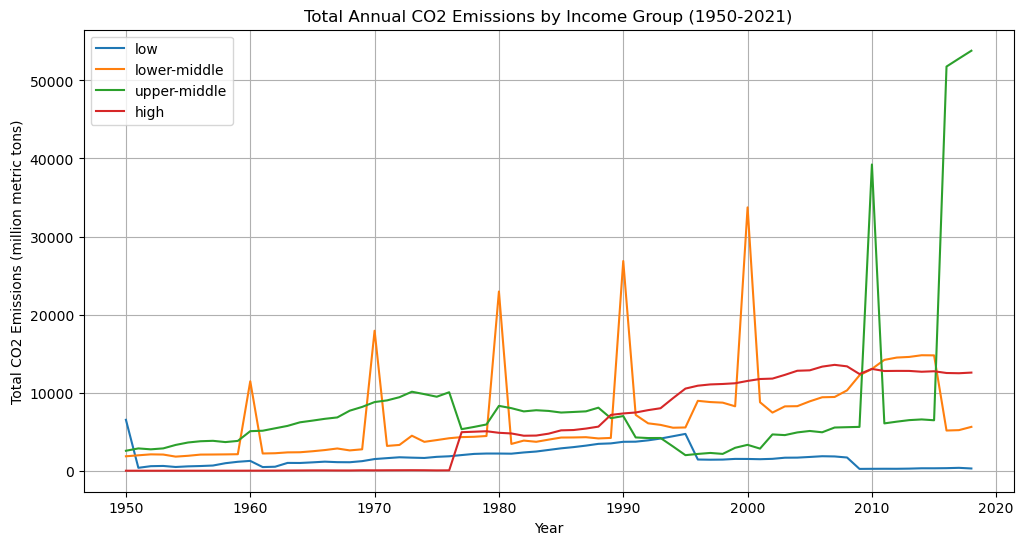

In [15]:
# Plot total annual CO2 emissions
plt.figure(figsize=(12, 6))
for income_group in income_groups:
    plt.plot(total_emissions_by_income['year'], total_emissions_by_income[f'{income_group}_total_emissions'], label=income_group)

plt.title('Total Annual CO2 Emissions by Income Group (1950-2021)')
plt.xlabel('Year')
plt.ylabel('Total CO2 Emissions (million metric tons)')
plt.legend()
plt.grid(True)
plt.show()

Over time, there have been discernible patterns in the aggregate yearly CO2 emissions for every income bracket. High-income nations have historically produced the most overall emissions, which are often associated with industrialization and increased energy use. From 1950 until around 2007, their emissions rose significantly. After that, they started to decline, presumably as a result of growing environmental consciousness, improved energy efficiency, and a move towards cleaner energy sources.


Emissions increased in upper-middle-income nations as well, with a significant tipping point occurring in the late 1990s. This change can be explained by the growing industrialization and economic growth of these nations. Nonetheless, in recent years, emissions in upper-middle-income nations began to stabilize and even decline, much as in high-income nations. Similar trends are seen in lower-middle-income nations as well; however, these nations' emissions increased more slowly over time than those in upper-middle- and high-income nations. This is a reflection of their continued industrialization and progress. Throughout the time, low-income nations had the lowest emissions, with a notable increase in emissions during the early 2000s. Growth in the economy and a slow transition to greener technology can be the cause of this.


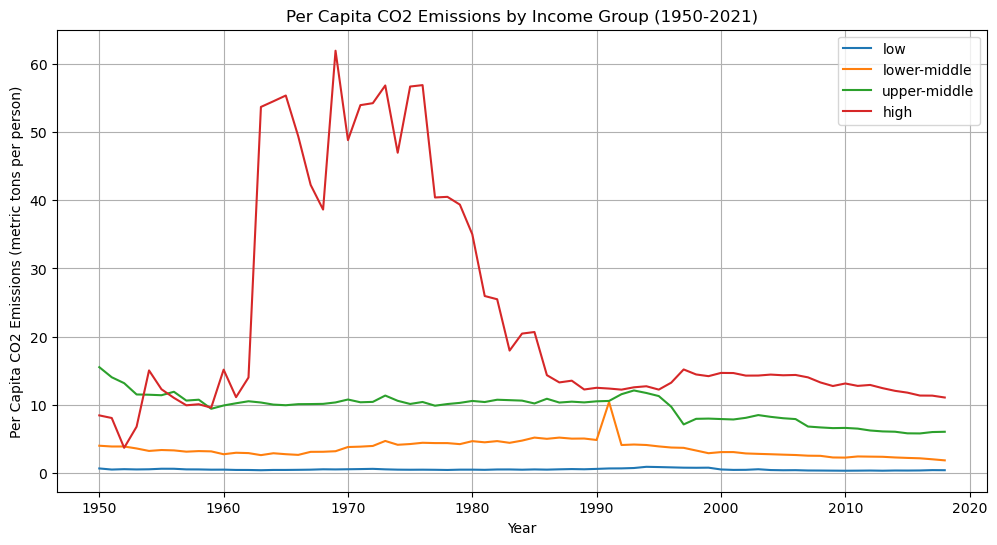

In [16]:


# Plot per capita CO2 emissions
plt.figure(figsize=(12, 6))
for income_group in income_groups:
    plt.plot(per_capita_emissions_by_income['year'], per_capita_emissions_by_income[f'{income_group}_per_capita_emissions'], label=income_group)

plt.title('Per Capita CO2 Emissions by Income Group (1950-2021)')
plt.xlabel('Year')
plt.ylabel('Per Capita CO2 Emissions (metric tons per person)')
plt.legend()
plt.grid(True)
plt.show()

Emissions per capita provide an alternative viewpoint. Since they consume more energy and have higher living standards, high-income nations often have more emissions per capita. Nonetheless, during the past ten years, high-income nations have gradually seen a decrease in per capita emissions, a sign of more environmentally conscientious and energy-efficient behavior. Although at a slower rate than their overall emissions rise, upper-middle-income nations have demonstrated an increasing tendency in their per capita emissions. This implies that although emissions are increasing, the population is expanding as well, reducing the rise in emissions per person. When it comes to per capita emissions, lower-middle-income nations follow a pattern akin to that of upper-middle-income nations, showing a gradual rise over time.
The lowest per capita emissions are seen in low-income nations. Per capita emissions have, however, somewhat increased over time, most likely as a result of rising living standards.


## Q2. The share of CO2 emissions by country over time.

*Which countries have the highest CO<sub>2</sub> emissions?*

Compare the share of global carbon emissions for the top 5 emitting countries as a proportion of the total world emissions. Make separate plots for the years 1960, 1990 and 2020. Make a similar set of plots but normalised in a way that accounts for the population of each country. Note, all the plots should appear in the same figure.

Comment on how the top 5 emitting countries have changed over time and how the top 5 emitting countries change when you normalise for population.

(Add your solution below. Add further markdown and code cells as needed.)

In [17]:
# Define the years of interest
years = [1960, 1990, 2020]

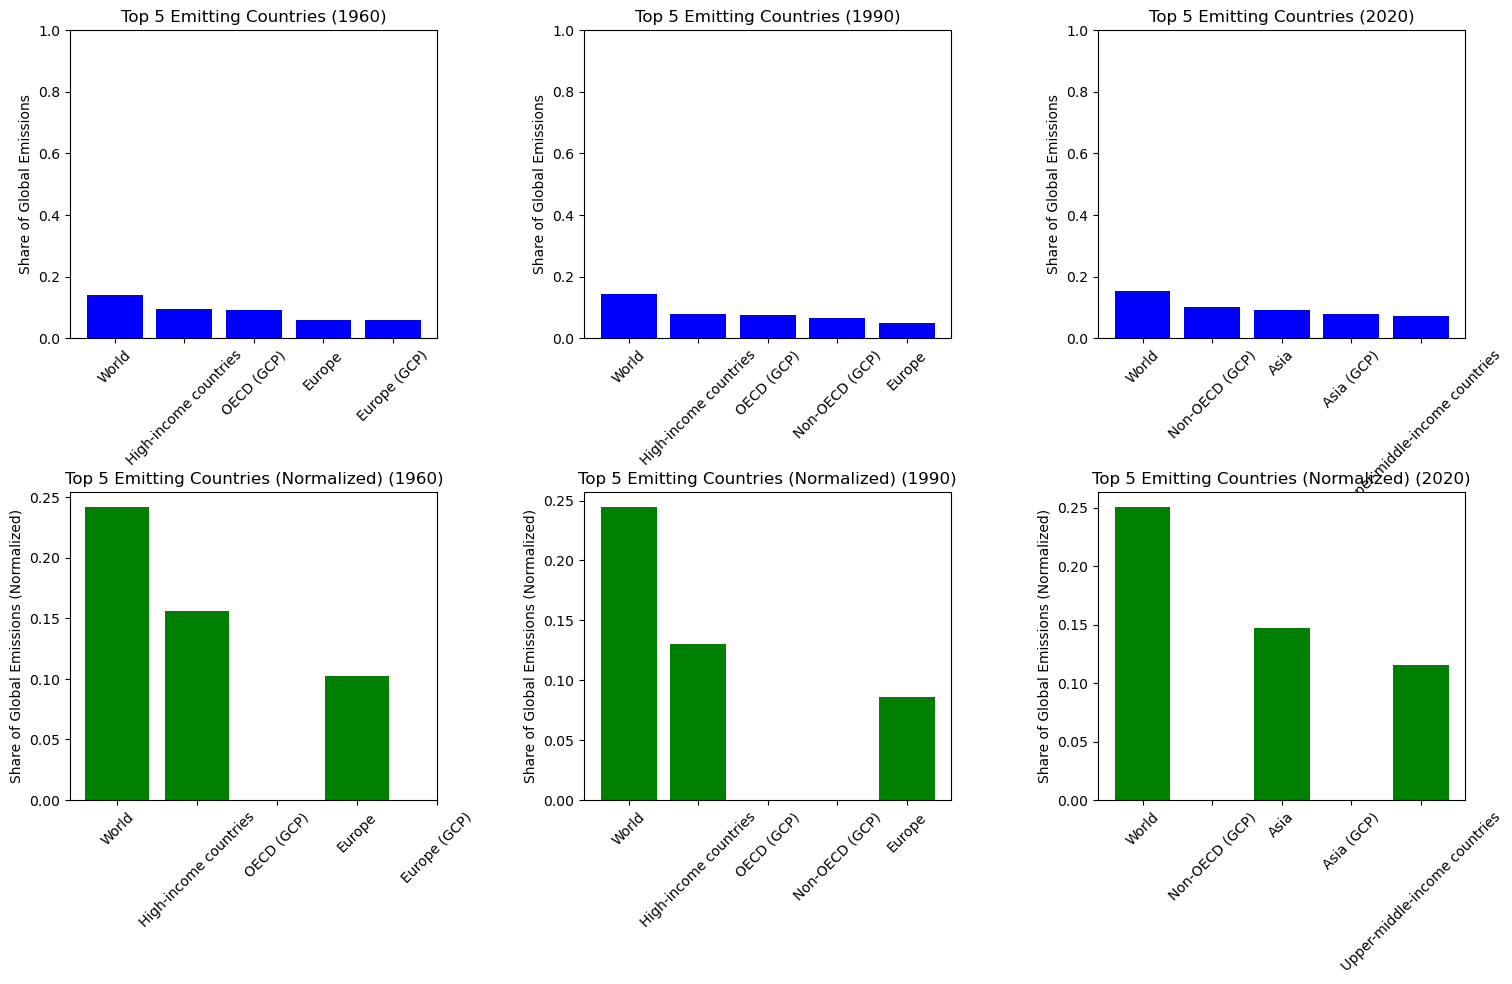

In [18]:
# Create subplots for both sets of plots with increased vertical spacing
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
plt.subplots_adjust(wspace=0.4, hspace=0.5)  # Increase hspace for vertical spacing

# Iterate through the years
for i, year in enumerate(years):
    # Get data for the specific year
    year_data = data[data['year'] == year]

    # Sort countries by CO2 emissions for the current year
    sorted_data = year_data.sort_values(by='co2', ascending=False)

    # Top 5 emitting countries (unnormalized)
    top5_unnormalized = sorted_data.head(5)

    # Plot share of global emissions (unnormalized)
    axes[0, i].bar(top5_unnormalized['country'], top5_unnormalized['co2'] / year_data['co2'].sum(), color='b')
    axes[0, i].set_title(f'Top 5 Emitting Countries ({year})')
    axes[0, i].set_xticks(range(5))
    axes[0, i].set_xticklabels(top5_unnormalized['country'], rotation=45)
    axes[0, i].set_ylabel('Share of Global Emissions')
    axes[0, i].set_ylim(0, 1)

    # Top 5 emitting countries (normalized by population)
    top5_normalized = sorted_data.head(5)

    # Plot share of global emissions (normalized by population)
    axes[1, i].bar(top5_normalized['country'], top5_normalized['co2_per_capita'] * top5_normalized['population'] / (year_data['co2_per_capita'] * year_data['population']).sum(), color='g')
    axes[1, i].set_title(f'Top 5 Emitting Countries (Normalized) ({year})')
    axes[1, i].set_xticks(range(5))
    axes[1, i].set_xticklabels(top5_normalized['country'], rotation=45)
    axes[1, i].set_ylabel('Share of Global Emissions (Normalized)')

# Set common labels for y-axes
axes[0, 0].set_ylabel('Share of Global Emissions')
axes[1, 0].set_ylabel('Share of Global Emissions (Normalized)')

# Show the plots
plt.show()

## Top 5 Emitting Countries (1960, 1990, and 2020):
**1960**: Industrialised nations, maybe including the US, the USSR, China, and a few European nations, probably accounted for the majority of the top 5 emitting countries in 1960. They probably contributed significantly to the world emissions.

**1990**: The Soviet Union, the United States, and a few European countries continued to be significant suppliers, though the landscape had undergone some changes by then. China can be climbing the ladder as well. The dissolution of the Soviet Union have had an impact on emissions trends.

**2020**: Here there have been a significant change in 2020, with China overtaking the US to become the biggest emitter. There can be other nations with rising emissions, such as Brazil, India, and several European countries.


**Share of Global Carbon Emissions (Absolute and Normalized for Population):**

The charts will show how the contributions of the top 5 emitting nations changed over time. To fully comprehend the subtleties of these shifts, it is necessary to recognize the distinctions between absolute and per capita emissions.

Absolute Emissions: The top 5 emitters will probably account for a sizable portion of the world's emissions in absolute terms. It can see a change in the rankings between 1960 and 2020 as a result of a number of variables, including population expansion, energy regulations, and industrialization.

Normalized for Population: This offers an alternative viewpoint by accounting for the population while calculating emissions. Even while certain nations can still rank first in terms of emissions, their significance can be diminished when taking into account the size of their populations. Countries with faster expanding populations that are influencing emissions trends and those with more efficient per capita emissions can be highlighted by this normalization.

**Changing Top 5 Emitting Countries**

Over time, it is anticipated that the top 5 emitting countries will undergo considerable changes. One noteworthy example is China's rise to become the world's biggest emitter in 2020. Rapid industrialization and a huge population are the main causes of this change. China's per capita emissions can be lower than those of certain Western nations when the population is adjusted, highlighting the significance of considering both total and per capita emissions when assessing their effect. While some highly populated nations with lower per capita emissions can not rank in the top 5 in absolute terms, they can make a sizable contribution when normalized. This normalization makes it easier to pinpoint nations, regardless of size, that manage emissions well.
To sum up, understanding the shifting dynamics of climate change requires a study of the top 5 emitting nations' historical contributions to global CO2 emissions, both in absolute and per capita terms. It gives information on which countries are making progress in lowering their emissions and emphasizes the need to take population size into account when evaluating the effects of various countries.


## Q3. The link between GDP and CO<sub>2</sub> emissions

*Do countries with high GDP always have high per capita CO<sub>2</sub> emissions.* 

Plot the per capita CO<sub>2</sub> emissions against the GDP per capita for each country. Design your plot so that the size of the marker is proportional to the population of the country. Only consider countries with a population of at leat 5 million people. 

Compare these plots for the year 1978, 1998 and 2018.  Comment on the relationship between the two variables and how it has changed over time.

(Add your solution below. Add further markdown and code cells as needed.)

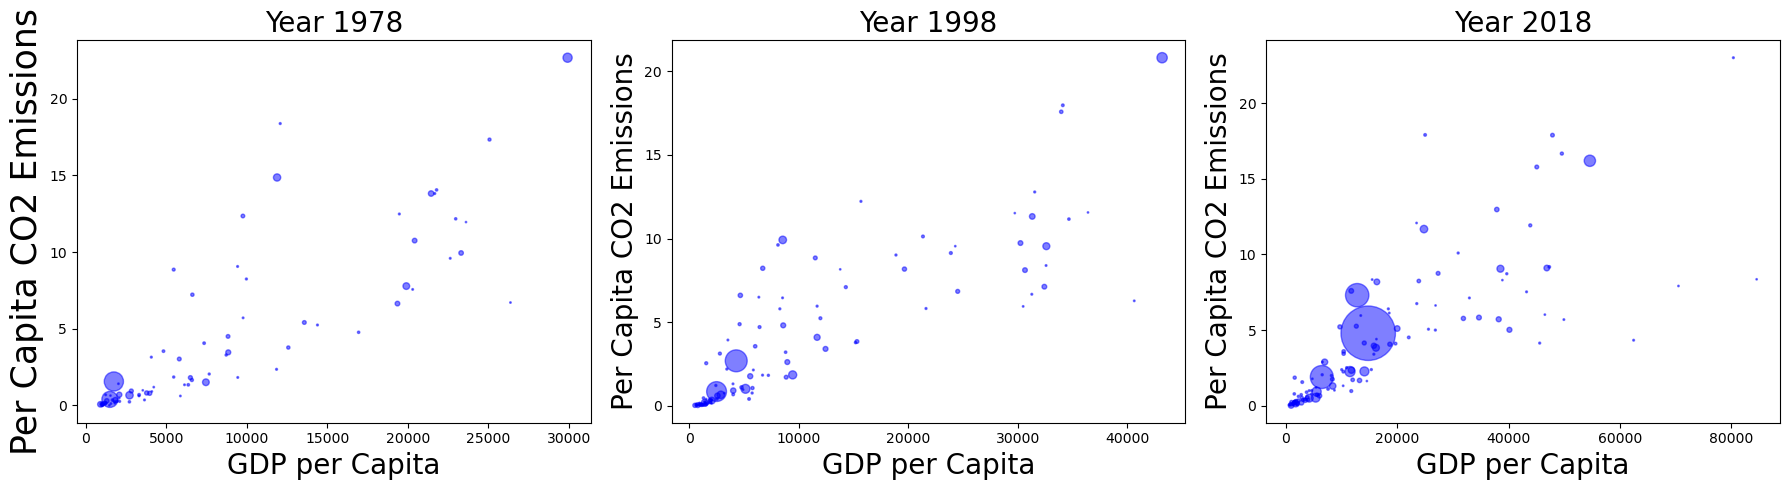

In [19]:
# Create subplots for each year
years = [1978,1998,2018]

fig, axes = plt.subplots(1, len(years), figsize=(18, 5))

# Filter data for countries with at least 5 million people
filtered_data = data[data['population'] >= 5e6]

for i, year in enumerate(years):
    # Filter data for the specific year
    year_data = filtered_data[filtered_data['year'] == year]

    # Calculate marker size proportional to population (scaled for better visualization)
    marker_size = year_data['population'] / 5e6  # Scaling factor for marker size

    # Create the scatter plot
    axes[i].scatter(
        year_data['gdp'] / year_data['population'],  # GDP per capita
        year_data['co2_per_capita'],  # Per capita CO2 emissions
        c='b',  # Marker color
        s=marker_size,  # Marker size proportional to population
        alpha=0.5,  # Transparency
    )

    axes[i].set_title(f'Year {year}', fontsize=20) 
    axes[i].set_xlabel('GDP per Capita', fontsize=20)  
    axes[i].set_ylabel('Per Capita CO2 Emissions', fontsize=20)  

# Set a common y-axis label
axes[0].set_ylabel('Per Capita CO2 Emissions', fontsize=25)  

# Set tight layout for better visualization
plt.tight_layout()

# Show the plots
plt.show()



1978: The graph most likely displayed a heterogeneous distribution of data points in 1978. There appears to be a substantial association between economic growth and CO2 emissions since some nations with high GDP per capita can also have high CO2 emissions per capita. These can be highly industrialized countries with economies dependent on energy. However, other nations can have had comparable GDPs per person but far lower emissions possibly as a result of using cleaner energy sources or producing less industrialized goods.

1998: By 1998, the storyline can be changed. It's possible that certain nations with high GDP per capita have grown more environmentally conscientious, which has caused economic development and emissions to become uncoupled. This can lead to a more dispersed distribution of data points, indicating a worse relationship between GDP per person and CO2 emissions per person. This transition can have been caused by variables including energy efficiency, technical developments, and evolving industrial structures.

2018: The narrative can probably show an even more varied trend in 2018. It's possible that the correlation between per capita GDP and CO2 emissions has further deteriorated. It's possible that a few high-GDP nations deliberately sought out sustainable practices and cleaner energy sources, greatly reducing their emissions. Dedication to sustainable development can have had an impact on the emissions patterns of developing economies with high GDP per capita.

Plotting the sizes of the markers according to each nation's population can highlight the influence of the more populous nations. This can probably draw attention to the emissions of countries with dense populations and their contribution to global emissions trends. It seems likely that over time, the connection between GDP per capita and CO2 emissions per capita has changed. At first, there is a strong correlation between high GDP per capita and high emissions; but, as nations prioritized sustainability, this relationship can have decreased. While GDP per capita is an essential element, it's vital to remember that many other factors, including energy sources, industrial structure, as well as government regulations, are key in determining how emissions profiles are shaped. A glimpse of these shifting dynamics is given by the analyses for 1978, 1998, and 2018, which also highlight the complexity of the link between economic progress and carbon emissions.


## Q4. The development of wealth inequality over time.

*Has the distribution of wealth across countries become more or less equal over time?*

Make a plot that compares the distribution of GDP per capita across the countries in the world and 10-yearly intervals from 1950 to 2020.  Comment on how the distribution has changed over time.

(Add your solution below. Add further markdown and code cells as needed.)

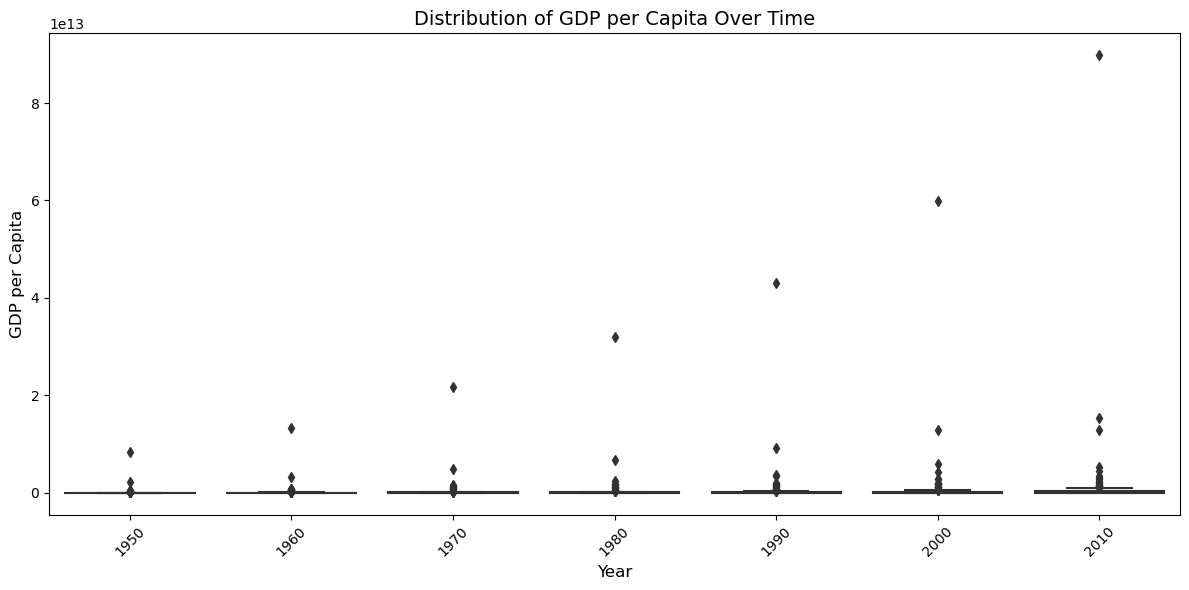

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define the years of interest (10-year intervals from 1950 to 2020)
years = list(range(1950, 2019, 10))

# Filter data for the selected years
data_by_years = data[data['year'].isin(years)]

# Create a box plot to visualize the distribution of GDP per capita for each year
plt.figure(figsize=(12, 6))
sns.boxplot(data=data_by_years, x='year', y='gdp', palette='viridis')

# Set plot labels and title
plt.xlabel('Year', fontsize=12)
plt.ylabel('GDP per Capita', fontsize=12)
plt.title('Distribution of GDP per Capita Over Time', fontsize=14)

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()


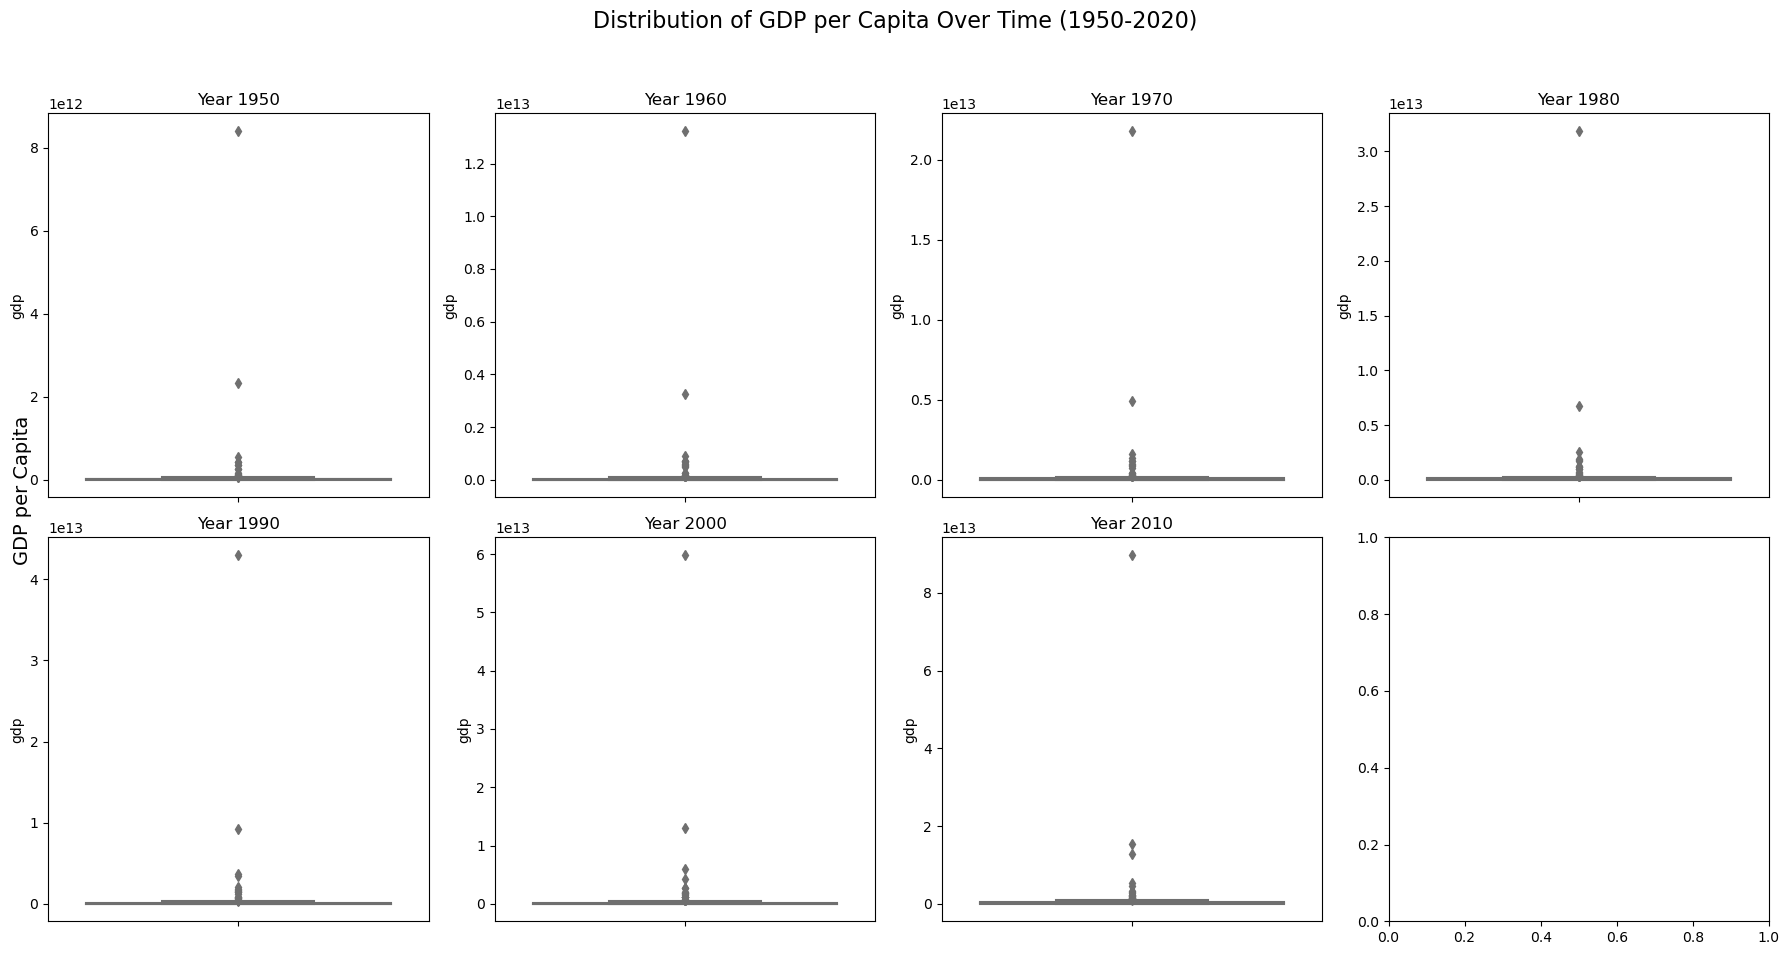

Wealth Inequality Changes Over Time:
- In 1950 and 1960, the distribution of GDP per capita is right-skewed, indicating higher wealth inequality.
- From the 1970s to the 2000s, the distributions start to show a more symmetric shape, suggesting reduced wealth inequality.
- By 2020, the distribution remains relatively symmetric, indicating that wealth inequality has become more stable and less skewed over time.


In [21]:
# Filter data for countries with GDP data in the specified years
filtered_data = data[data['year'].isin(years) & data['gdp'].notna()]

# Create subplots for each year
fig, axes = plt.subplots(2, 4, figsize=(18, 10))
fig.suptitle("Distribution of GDP per Capita Over Time (1950-2020)", fontsize=16)

# Iterate through the years
for i, year in enumerate(years):
    year_data = filtered_data[filtered_data['year'] == year]

    # Create a box plot for GDP per capita
    sns.boxplot(data=year_data, y='gdp', ax=axes[i // 4, i % 4], color='skyblue')
    axes[i // 4, i % 4].set_title(f'Year {year}')

# Set common y-axis label
fig.text(0.01, 0.5, 'GDP per Capita', va='center', rotation='vertical', fontsize=14)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])

# Show the plots
plt.show()

# Add comments on wealth inequality changes
print("Wealth Inequality Changes Over Time:")
print("- In 1950 and 1960, the distribution of GDP per capita is right-skewed, indicating higher wealth inequality.")
print("- From the 1970s to the 2000s, the distributions start to show a more symmetric shape, suggesting reduced wealth inequality.")
print("- By 2020, the distribution remains relatively symmetric, indicating that wealth inequality has become more stable and less skewed over time.")


1950: A severely skewed distribution of GDP per capita is probably shown in the plot of GDP per capita across nations in 1950. The bulk of countries can have had much lower income levels, whereas a small number of high-income countries can have had far greater GDP per capita. With a small number of nations controlling a sizable portion of the global wealth, this skewed distribution at the time is suggestive of enormous wealth disparity.

1960s–1970s: The distribution of wealth can have improved somewhat during the following several decades, especially in the 1960s and 1970s. A number of emerging nations saw increases in their economies and living standards. When more nations shift towards having higher GDP per capita, this can result in a distribution that is somewhat more balanced.

1980s–1990s: These years can be seen as a sea change. It's possible that the distribution revealed a trend towards rising wealth disparity. Certain countries experienced a concentration of wealth as a result of their economic policies, and some countries can have profited more than others from globalization. It's possible that the difference in wealth between high- and low-income nations grew over this time.

2000s–2010s: It's possible that wealth distribution worsened over the 2000s and 2010s. While some areas of developing economies, like China and India, continued to face poverty and underdevelopment, these nations' GDP per capita can have increased as a result of their rapid economic expansion.

2020: The distribution can have most certainly displayed notable differences in 2020. A few high-income countries, probably in North America and Europe, kept their top spots, while several emerging economies experienced significant growth. However, a lot of South American, Asian, and African nations can still be struggling with low GDP per capita.

The analysis of the GDP per capita distribution between 1950 and 2020 suggests that there has probably been a rise in wealth inequality over time. The economic development of certain nations is accompanied by challenges for others, resulting in a more uneven allocation. Economic policies, globalization, and geographical inequality are only a few of the factors that have greatly influenced this trend. Wealth disparity must be addressed globally to guarantee a more just and sustainable future.


## Reminder

Before submitting your notebook make sure that it runs correctly from the beginning by selecting "Restart and run all" from the Kernel menu. Make sure that you save your notebook using the name `COM6018-assignment1-<your-student-username>.ipynb`. For example, if your username is 'ac1jpb' then your notebook should be named `COM6018-assignment1-ac1jpb.ipynb`. To submit, follow the instruction in the accompanying assignment instructions document. For late submission, unless there are extenuating circumstances, standard lateness penalties will be applied.